In [1]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale

import researchpy as rp
from scipy import stats

In [2]:
blood_data = pd.read_csv('archive/blood_pressure.csv')
blood_data.sample(10)

,patient,sex,agegrp,bp_before,bp_after
73,74,Female,30-45,167,144
38,39,Male,46-59,185,140
6,7,Male,30-45,148,133
32,33,Male,46-59,167,175
99,100,Female,46-59,145,143
91,92,Female,46-59,162,132
109,110,Female,60+,163,154
72,73,Female,30-45,141,168
115,116,Female,60+,152,152
85,86,Female,46-59,154,146


In [3]:
blood_data.describe().T

,count,mean,std,min,25%,50%,75%,max
patient,120.0,60.500000,34.785054,1.0,30.75,60.5,90.25,120.0
bp_before,120.0,156.450000,11.389845,138.0,147.00,154.5,164.00,185.0
bp_after,120.0,151.358333,14.177622,125.0,140.75,149.5,161.00,185.0


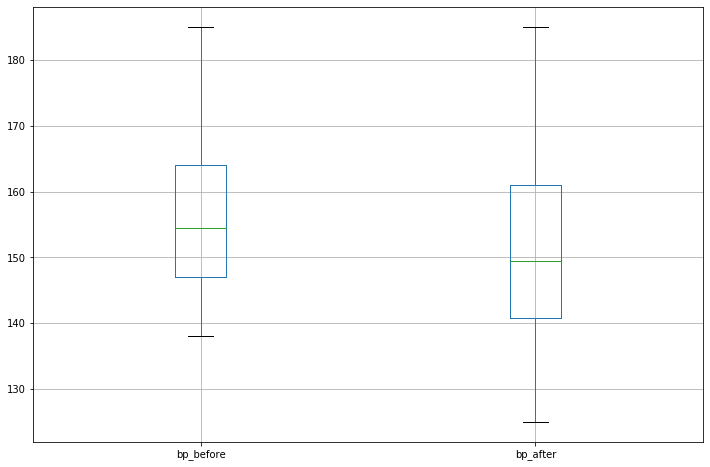

In [4]:
blood_data[['bp_before','bp_after']].boxplot(figsize=(12,8))

In [5]:
#this indicates difference in variance of both samples
#lower than 5% means significance difference in variance
#thus we cant use the independent T-test ( for mean )
stats.levene(blood_data['bp_after'],blood_data['bp_before'])

LeveneResult(statistic=4.863729003161597, pvalue=0.028383666362347747)

(array([ 3.,  7., 17., 16., 27., 18., 23.,  3.,  4.,  2.]),
 array([-2.39778752, -1.88107908, -1.36437064, -0.8476622 , -0.33095376,
         0.18575468,  0.70246312,  1.21917156,  1.73588   ,  2.25258844,
         2.76929689]),
 <a list of 10 Patch objects>)

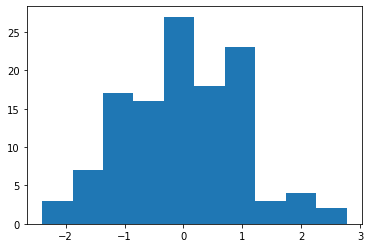

In [6]:
#data seems to be normally distributed
blood_data['bp_diff'] = scale(blood_data['bp_after']- blood_data['bp_before'])
plt.hist(blood_data['bp_diff'])

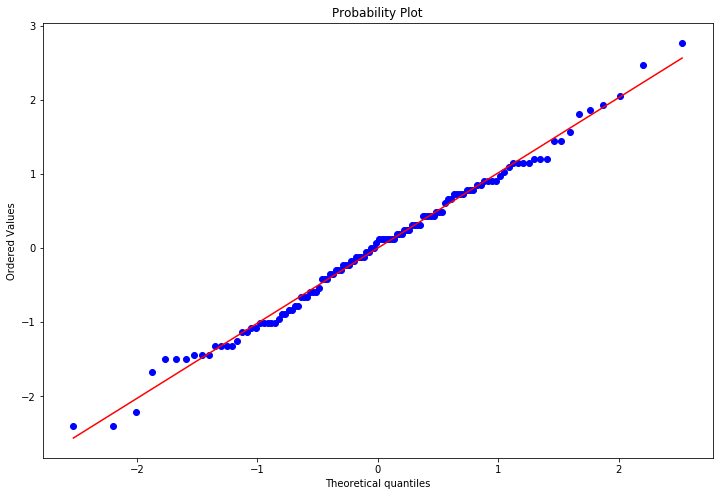

In [7]:
#more prove for normal distribution
plt.figure(figsize=(12,8))

stats.probplot(blood_data['bp_diff'],plot=plt)
plt.show()

In [8]:
#lastly shapiro for normal distribution prove
#less than 5% means not normally distributed ( alt hypothesis )
stats.shapiro(blood_data['bp_diff'])

(0.9926842451095581, 0.7841846942901611)

In [9]:
#to use ttest on paired samples, observe ttest_rel instead of ttest_int
#once again we cant rely on this test since levene test proves difference in variance
#since our p value score less than 1% that means there is a significant difference in the mean
stats.ttest_rel(blood_data['bp_after'],blood_data['bp_before'])

Ttest_relResult(statistic=-3.3371870510833657, pvalue=0.0011297914644840823)

In [10]:
#to overcome the variance difference for paired values use this for T-test
#the wilcoxon signed-rank test compare between the medians not the means, which is not really the T-test
#the t value and the p value tell us the that the differnce between the medians between the pair values
#are significant
#which mean the excersie peformed has significant difference on the blood pressures
rp.ttest(blood_data['bp_after'],blood_data['bp_before'],
        paired = True, equal_variances=False)

,Wilcoxon signed-rank test,results
0,Mean for bp_after =,151.358333
1,Mean for bp_before =,156.450000
2,T value =,2234.500000
3,Z value =,-3.191600
4,Two sided p value =,0.001400
5,r =,-0.206000
